# **PREDICTION OF HOUSE PRICE: A REGRESSION MODEL**

![image](house_pricing.jpg)

Image credit: https://images.app.goo.gl/7Szx2zjTCxpjWbhb9

In this project, we implement a regression model to predict house prices. We use the *boston_housing* dataset from `keras.datasets`. 

**Contents**

1. Load the dataset
2. Build the regression model
3. Training and Validation using k-fold
4. Training the model longer
5. Plot the validaton scores
6. Predictions

In [1]:
# setup
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

> ### **Load the dataset**

In [30]:
from keras.datasets import boston_housing

# get the training and test data
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


In [27]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [11]:
import pandas as pd
df = pd.DataFrame(train_data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


The input data takes values in widely different ranges. Feeding the NN with such data might make the learning difficult, therefore we perform feature-wise normalization on both the training and test data (using the training data). It consists in the following: For each feature, substract the mean and divide by the standard deviation, so that the is centered around 0 with a std as 1.

In [31]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
x_train = (train_data-mean)/std
print(x_train[0])

x_test = (test_data-mean)/std
print(x_test[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
[ 1.55369355 -0.48361547  1.0283258  -0.25683275  1.03838067  0.23545815
  1.11048828 -0.93976936  1.67588577  1.5652875   0.78447637 -3.48459553
  2.25092074]


> ### **Build the Regression Model**

Since, we will need to instantiate the model multiple times, we construct it using a function.

In [35]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])

    model.compile(
        optimizer = 'rmsprop', # root mean squarred propagation
        loss = 'mse',
        metrics = ['mae']
    )

    return model

> ### **Training and Validation using k-fold**

This method is used when only few data points are availble in the dataset and splitting in it training and validation sets would result in a high variance in the validation scores.

In [32]:
y_train = train_targets
y_test = test_targets

In [48]:
k = 4 # number of folds
num_val_samples = len(train_data) // 4
num_epochs = 100
batch = 16
all_mae_scores = []

for i in range(k):
    print("Processing fold #", i)
    val_data = x_train[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i+1) * num_val_samples]
    x_partial_train = np.concatenate([
        x_train[:i * num_val_samples],
        x_train[(i+1) * num_val_samples:]
    ], axis = 0)
    y_partial_train = np.concatenate([
        y_train[:i * num_val_samples],
        y_train[(i+1) * num_val_samples:]
    ], axis = 0)

    model = build_model()
    history = model.fit(
        x_partial_train,
        y_partial_train,
        epochs = num_epochs,
        batch_size = batch,
        verbose = 0
    )

    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
    all_mae_scores.append(val_mae)

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


In [49]:
print(all_mae_scores)

# Average score
print(np.mean(all_mae_scores))

[1.7890394926071167, 2.350151777267456, 2.484663486480713, 2.347407817840576]
2.2428156435489655


This means the predictions are off by about $2240 on average.

In [53]:
history.keys()

dict_keys(['loss', 'mae'])

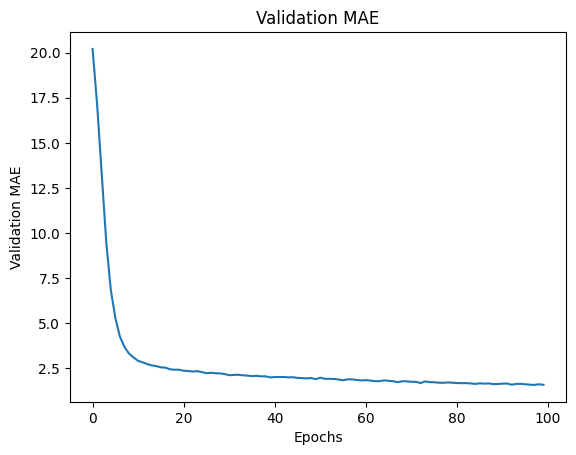

In [55]:
plt.plot(history['mae'])
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.title("Validation MAE")
plt.show()

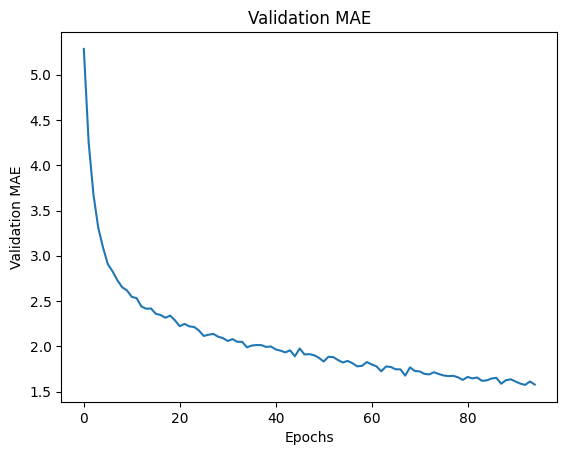

In [61]:
truncated_history = history['mae'][5:]
plt.plot(truncated_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.title("Validation MAE")
plt.show()

> ### **Train the model longer**

In [40]:
k = 4 # number of folds
num_val_samples = len(train_data) // 4
num_epochs = 500
batch = 16
all_mae_histories = []

for i in range(k):
    print("Processing fold #", i)
    val_data = x_train[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i+1) * num_val_samples]
    x_partial_train = np.concatenate([
        x_train[:i * num_val_samples],
        x_train[(i+1) * num_val_samples:]
    ], axis = 0)
    y_partial_train = np.concatenate([
        y_train[:i * num_val_samples],
        y_train[(i+1) * num_val_samples:]
    ], axis = 0)

    model = build_model()
    history = model.fit(
        x_partial_train,
        y_partial_train,
        epochs = num_epochs,
        batch_size = batch,
        validation_data = (val_data, val_targets),
        verbose = 0
    )

    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


In [42]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

> ### **Plot the validation scores**

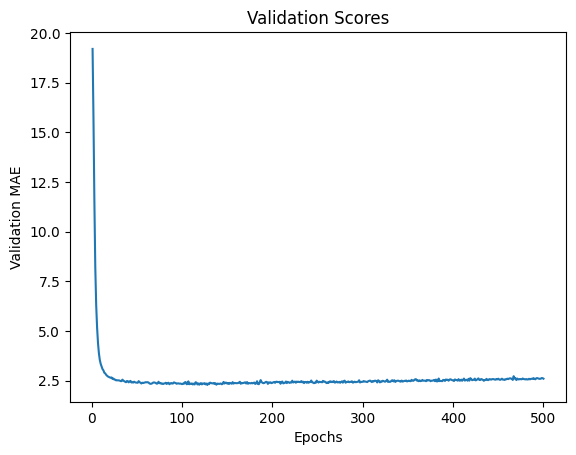

In [43]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.title("Validation Scores")
plt.show()

It may be a little difficult to read the plot, due to a scaling issue: the validation MAE for the first few epochs is dramatically higher than the values that follow. Let’s omit the first 10 data points, which are on a different scale than the rest of the curve.

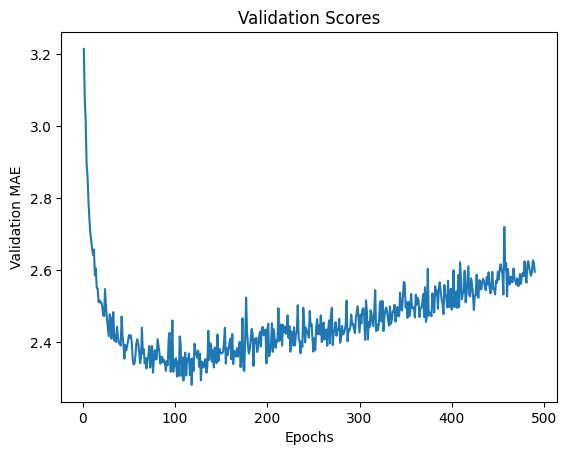

In [45]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.title("Validation Scores")
plt.show()

> ### **Predictions**

In [47]:
predictions = model.predict(x_test)
predictions[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([10.805661], dtype=float32)